In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf

## 1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data1_0.2.csv to data1_0.2.csv


In [3]:
df=pd.read_csv("data1_0.2.csv", header=None)
df

,0,1,2
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
...,...,...,...
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1


In [4]:
df.rename(columns={0: "Feature_1", 1:"Feature_2", 2:"Class"}, inplace=True)
df

,Feature_1,Feature_2,Class
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
...,...,...,...
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1


In [5]:
df["Class"].unique()

array([0, 1])

In [6]:
data=df.values
data

array([[ 0.04599954, -0.18176747,  0.        ],
       [-0.51614619,  0.21006791,  0.        ],
       [ 0.24636835, -0.5149011 ,  0.        ],
       ...,
       [-0.23646717,  0.21286969,  1.        ],
       [ 0.74528979, -0.21002566,  1.        ],
       [ 0.2486673 ,  0.21832184,  1.        ]])

In [7]:
data_ft=data[:,0:2]
data_ft

array([[ 0.04599954, -0.18176747],
       [-0.51614619,  0.21006791],
       [ 0.24636835, -0.5149011 ],
       ...,
       [-0.23646717,  0.21286969],
       [ 0.74528979, -0.21002566],
       [ 0.2486673 ,  0.21832184]])

In [8]:
data_clas=data[:,2]
data_clas

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
X_train, X_rest, y_train, y_rest = train_test_split(data_ft, data_clas, test_size = 0.3, random_state = 42)


In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size = 0.9, random_state = 61)


In [11]:
print("X_train:",X_train.shape, "," , "X_val:", X_val.shape, "," , "X_test:", X_test.shape)
print("y_train:",y_train.shape, "," , "y_val:", y_val.shape, "," , "y_test:", y_test.shape)

X_train: (535, 2) , X_val: (23, 2) , X_test: (207, 2)
y_train: (535,) , y_val: (23,) , y_test: (207,)


# 2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer
** Single Hidden Layer Deep network **


**4 hidden nodes**

In [12]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.Input(shape=(2,)))
model1.add(tf.keras.layers.Dense(4, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [13]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.003)
model1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [14]:
history = model1.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 9ms/step - loss: 0.6694 - accuracy: 0.5776 - val_loss: 0.6786 - val_accuracy: 0.5797
Epoch 2/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.5776 - val_loss: 0.6780 - val_accuracy: 0.5797
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.5776 - val_loss: 0.6770 - val_accuracy: 0.5797
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5776 - val_loss: 0.6762 - val_accuracy: 0.5797
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5776 - val_loss: 0.6748 - val_accuracy: 0.5797
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.5776 - val_loss: 0.6741 - val_accuracy: 0.5749
Epoch 7/15
34/34 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.5776 - val_loss: 0.6736 - val_accuracy: 0.5749
Epoch 8/15
34/34 [==

In [15]:
results = model1.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model1.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 24ms/step - loss: 0.5589 - accuracy: 0.7391
loss: 0.559
accuracy: 0.739


Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same.

Applied a learning rate of 0.003 (If the learning rate is high, then training may not converge or even diverge.
                                  Changes in the weight are going to be  big which let optimizer overshoots the minimum and makes the loss worse in this case. 
                                  So we have chosen between 0.001 and 0.01 and compared their accuracy performance. 
                                  And having a  very less learning rate takes a very long  time to train and test the model)

Here we have used the ReLU activation function for hidden layer because it is less affeted by vanishing gradients that prevent deep models from being trained.

The given problem is logistic regression classification so we use a Sigmoid function in the output layer which takes a real value as input and outputs values in the range 0 to 1.

A Binary Cross entropy loss function is used since the class label is a binary (0 or 1) classification 

Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.559

Observed Accuracy: 0.739

**8 hidden nodes**

In [16]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(2,)))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [17]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.003)
model2.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [18]:
history = model2.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 7ms/step - loss: 0.7115 - accuracy: 0.5121 - val_loss: 0.7072 - val_accuracy: 0.4734
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5383 - val_loss: 0.6943 - val_accuracy: 0.5217
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5533 - val_loss: 0.6908 - val_accuracy: 0.5411
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5439 - val_loss: 0.6875 - val_accuracy: 0.5411
Epoch 5/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5551 - val_loss: 0.6859 - val_accuracy: 0.5507
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5514 - val_loss: 0.6844 - val_accuracy: 0.5556
Epoch 7/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5570 - val_loss: 0.6825 - val_accuracy: 0.5749
Epoch 8/15
34/34 [==

In [19]:
results = model2.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model2.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 28ms/step - loss: 0.5845 - accuracy: 0.6957
loss: 0.585
accuracy: 0.696


Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same.

Applied a learning rate of 0.003 (If the learning rate is high, then training may not converge or even diverge. Changes in the weight are going to be big which let optimizer overshoots the minimum and makes the loss worse in this case. So we have chosen between 0.001 and 0.01 and compared their accuracy performance. And having a very less learning rate takes a very long time to train and test the model)

Here we have used the ReLU activation function for hidden layer because it is less affeted by vanishing gradients that prevent deep models from being trained.

The given problem is logistic regression classification so we use a Sigmoid function in the output layer which takes a real value as input and outputs values in the range 0 to 1.

A Binary Cross entropy loss function is used since the class label is a binary (0 or 1) classification

Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same.

Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.585

Observed Accuracy:  0.696

**12 hidden nodes**

In [20]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.Input(shape=(2,)))
model3.add(tf.keras.layers.Dense(12, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                36        
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [21]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.03)
model3.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [22]:
history = model3.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.6752 - accuracy: 0.5664 - val_loss: 0.6695 - val_accuracy: 0.5797
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5682 - val_loss: 0.6679 - val_accuracy: 0.5797
Epoch 3/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.5813 - val_loss: 0.6602 - val_accuracy: 0.5990
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.5533 - val_loss: 0.6656 - val_accuracy: 0.5797
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.5850 - val_loss: 0.6463 - val_accuracy: 0.5797
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.5738 - val_loss: 0.6591 - val_accuracy: 0.5749
Epoch 7/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.5701 - val_loss: 0.6424 - val_accuracy: 0.5749
Epoch 8/15
34/34 [==

In [23]:
results = model3.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model3.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 26ms/step - loss: 0.4512 - accuracy: 0.7826
loss: 0.451
accuracy: 0.783


Report, compare, and explain the observed accuracy and minimum loss achieved.
Loss achieved: 0.451
Observed Accuracy: 0.783

**16 hidden nodes**

In [24]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.Input(shape=(2,)))
model4.add(tf.keras.layers.Dense(16, activation='relu'))
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [25]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.0003)
model4.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [26]:
history = model4.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.7484 - accuracy: 0.4224 - val_loss: 0.7440 - val_accuracy: 0.4300
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7419 - accuracy: 0.4318 - val_loss: 0.7381 - val_accuracy: 0.4493
Epoch 3/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.4393 - val_loss: 0.7332 - val_accuracy: 0.4541
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7301 - accuracy: 0.4486 - val_loss: 0.7285 - val_accuracy: 0.4348
Epoch 5/15
34/34 [==============================] - 0s 4ms/step - loss: 0.7252 - accuracy: 0.4355 - val_loss: 0.7247 - val_accuracy: 0.4251
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.4411 - val_loss: 0.7209 - val_accuracy: 0.4638
Epoch 7/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.4150 - val_loss: 0.7177 - val_accuracy: 0.4155
Epoch 8/15
34/34 [==

In [27]:
results = model4.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model4.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 25ms/step - loss: 0.6928 - accuracy: 0.5652
loss: 0.693
accuracy: 0.565


Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.693

Observed Accuracy: 0.565

### *** Comparison of Single hidden layer with varying hidden nodes ***


In [28]:

print("4 Hidden nodes")
results = model1.evaluate(X_val,y_val, verbose=0)
for name1, value1 in zip(model1.metrics_names, results):
  print("%s: %.3f" % (name1, value1))

print("\n8 Hidden nodes")
results = model2.evaluate(X_val,y_val, verbose=0)
for name2, value2 in zip(model2.metrics_names, results):
  print("%s: %.3f" % (name2, value2))

print("\n12 Hidden nodes")
results = model3.evaluate(X_val,y_val, verbose=0)
for name3, value3 in zip(model3.metrics_names, results):
  print("%s: %.3f" % (name3, value3))

print("\n16 Hidden nodes")
results = model4.evaluate(X_val,y_val, verbose=0)
for name4, value4 in zip(model4.metrics_names, results):
  print("%s: %.3f" % (name4, value4))

4 Hidden nodes
loss: 0.559
accuracy: 0.739

8 Hidden nodes
loss: 0.585
accuracy: 0.696

12 Hidden nodes
loss: 0.451
accuracy: 0.783

16 Hidden nodes
loss: 0.693
accuracy: 0.565


### **Double Hidden Layer Deep network with varying hidden nodes**

**4 hidden nodes in each layer**

In [29]:
model_1 = tf.keras.Sequential()

model_1.add(tf.keras.Input(shape=(2,)))
model_1.add(tf.keras.layers.Dense(4, activation='relu'))
model_1.add(tf.keras.layers.Dense(4, activation='relu'))
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [30]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.0003)
model_1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [31]:
history = model_1.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 9ms/step - loss: 0.7249 - accuracy: 0.4542 - val_loss: 0.7130 - val_accuracy: 0.4976
Epoch 2/15
34/34 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.4654 - val_loss: 0.7097 - val_accuracy: 0.5169
Epoch 3/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.4785 - val_loss: 0.7069 - val_accuracy: 0.5411
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.4822 - val_loss: 0.7042 - val_accuracy: 0.5314
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.4766 - val_loss: 0.7021 - val_accuracy: 0.5314
Epoch 6/15
34/34 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.4748 - val_loss: 0.7004 - val_accuracy: 0.5266
Epoch 7/15
34/34 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.4636 - val_loss: 0.6987 - val_accuracy: 0.5121
Epoch 8/15
34/34 [==

In [32]:
results = model_1.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model_1.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 24ms/step - loss: 0.6950 - accuracy: 0.4348
loss: 0.695
accuracy: 0.435


Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.655

Observed Accuracy: 0.435

*** 8 hidden nodes in each layer ***






In [33]:
model_2 = tf.keras.Sequential()

model_2.add(tf.keras.Input(shape=(2,)))
model_2.add(tf.keras.layers.Dense(8, activation='relu'))
model_2.add(tf.keras.layers.Dense(8, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 24        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [34]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.003)
model_2.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [35]:
history = model_2.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.6823 - accuracy: 0.5664 - val_loss: 0.6727 - val_accuracy: 0.5797
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.5776 - val_loss: 0.6676 - val_accuracy: 0.5797
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.5776 - val_loss: 0.6679 - val_accuracy: 0.5797
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5776 - val_loss: 0.6677 - val_accuracy: 0.5797
Epoch 5/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.5776 - val_loss: 0.6658 - val_accuracy: 0.5797
Epoch 6/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.5776 - val_loss: 0.6645 - val_accuracy: 0.5797
Epoch 7/15
34/34 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.5738 - val_loss: 0.6636 - val_accuracy: 0.5556
Epoch 8/15
34/34 [==

In [36]:
results = model_2.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model_2.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 23ms/step - loss: 0.5149 - accuracy: 0.7826
loss: 0.515
accuracy: 0.783


Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.515

Observed Accuracy: 0.783

**12 hidden nodes in each layer**

In [37]:
model_3 = tf.keras.Sequential()

model_3.add(tf.keras.Input(shape=(2,)))
model_3.add(tf.keras.layers.Dense(12, activation='relu'))
model_3.add(tf.keras.layers.Dense(12, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                36        
                                                                 
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 dense_16 (Dense)            (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [38]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.0003)
model_3.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [39]:
history = model_3.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.6952 - accuracy: 0.4710 - val_loss: 0.6928 - val_accuracy: 0.5266
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4953 - val_loss: 0.6899 - val_accuracy: 0.5411
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.5514 - val_loss: 0.6874 - val_accuracy: 0.5749
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5607 - val_loss: 0.6851 - val_accuracy: 0.5556
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5757 - val_loss: 0.6834 - val_accuracy: 0.5797
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5776 - val_loss: 0.6819 - val_accuracy: 0.5797
Epoch 7/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5776 - val_loss: 0.6808 - val_accuracy: 0.5797
Epoch 8/15
34/34 [==

In [40]:
results = model_3.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model_3.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 24ms/step - loss: 0.6122 - accuracy: 0.6957
loss: 0.612
accuracy: 0.696


Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved:  0.612

Observed Accuracy: 0.696

**16 hidden nodes in each layer**


In [41]:
model_4 = tf.keras.Sequential()

model_4.add(tf.keras.Input(shape=(2,)))
model_4.add(tf.keras.layers.Dense(16, activation='relu'))
model_4.add(tf.keras.layers.Dense(16, activation='relu'))
model_4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                48        
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [42]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.003)
model_4.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [43]:
history = model_4.fit(X_train,y_train,batch_size=16,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=True)

Epoch 1/15
34/34 [==============================] - 1s 8ms/step - loss: 0.6826 - accuracy: 0.5551 - val_loss: 0.6746 - val_accuracy: 0.5797
Epoch 2/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5776 - val_loss: 0.6720 - val_accuracy: 0.5797
Epoch 3/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5776 - val_loss: 0.6718 - val_accuracy: 0.5797
Epoch 4/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.5776 - val_loss: 0.6697 - val_accuracy: 0.5797
Epoch 5/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5720 - val_loss: 0.6685 - val_accuracy: 0.5459
Epoch 6/15
34/34 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.5589 - val_loss: 0.6662 - val_accuracy: 0.5266
Epoch 7/15
34/34 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.5682 - val_loss: 0.6645 - val_accuracy: 0.5749
Epoch 8/15
34/34 [==

In [44]:
results = model_4.evaluate(X_val,y_val, verbose=1)

for name, value in zip(model_4.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 [==============================] - 0s 24ms/step - loss: 0.4847 - accuracy: 0.7826
loss: 0.485
accuracy: 0.783


Report, compare, and explain the observed accuracy and minimum loss achieved.

Loss achieved: 0.485

Observed Accuracy: 0.783 

In [45]:
# Comparison of Single hidden layer with varying hidden nodes

print("4 Hidden nodes")
results = model_1.evaluate(X_val,y_val, verbose=1)
for name1, value1 in zip(model_1.metrics_names, results):
  print("%s: %.3f" % (name1, value1))

print("\n8 Hidden nodes")
results = model_2.evaluate(X_val,y_val, verbose=1)
for name2, value2 in zip(model_2.metrics_names, results):
  print("%s: %.3f" % (name2, value2))

print("\n12 Hidden nodes")
results = model_3.evaluate(X_val,y_val, verbose=1)
for name3, value3 in zip(model_3.metrics_names, results):
  print("%s: %.3f" % (name3, value3))

print("\n16 Hidden nodes")
results = model_4.evaluate(X_val,y_val, verbose=1)
for name4, value4 in zip(model_4.metrics_names, results):
  print("%s: %.3f" % (name4, value4))

4 Hidden nodes
1/1 [==============================] - 0s 21ms/step - loss: 0.6950 - accuracy: 0.4348
loss: 0.695
accuracy: 0.435

8 Hidden nodes
1/1 [==============================] - 0s 21ms/step - loss: 0.5149 - accuracy: 0.7826
loss: 0.515
accuracy: 0.783

12 Hidden nodes
1/1 [==============================] - 0s 27ms/step - loss: 0.6122 - accuracy: 0.6957
loss: 0.612
accuracy: 0.696

16 Hidden nodes
1/1 [==============================] - 0s 30ms/step - loss: 0.4847 - accuracy: 0.7826
loss: 0.485
accuracy: 0.783


## 3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters).

In [46]:
df2=df
df2

,Feature_1,Feature_2,Class
0,0.046000,-0.181767,0
1,-0.516146,0.210068,0
2,0.246368,-0.514901,0
3,-0.176004,0.538347,0
4,-0.540533,0.239300,0
...,...,...,...
760,0.218472,0.184996,1
761,-0.097992,-0.302559,1
762,-0.236467,0.212870,1
763,0.745290,-0.210026,1


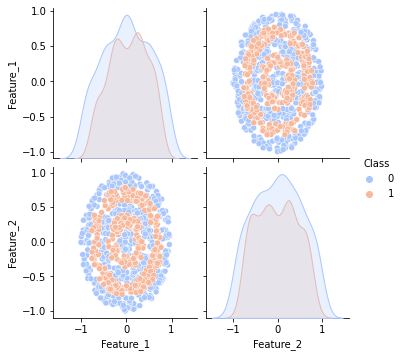

In [47]:
import seaborn as sns

sns.pairplot(df, hue ="Class", palette ='coolwarm')

Both the features are normally distributed in each class, therefore feature transformation is not necessary.


In [48]:
df2.describe()


,Feature_1,Feature_2,Class
count,765.000000,765.000000,765.000000
mean,0.025033,-0.006364,0.418301
std,0.480400,0.499142,0.493603
min,-0.996726,-0.999604,0.000000
25%,-0.350203,-0.419548,0.000000
50%,0.029291,-0.006020,0.000000
75%,0.404412,0.382453,1.000000
max,0.953268,0.984892,1.000000


In [49]:
data=df2.values
data

array([[ 0.04599954, -0.18176747,  0.        ],
       [-0.51614619,  0.21006791,  0.        ],
       [ 0.24636835, -0.5149011 ,  0.        ],
       ...,
       [-0.23646717,  0.21286969,  1.        ],
       [ 0.74528979, -0.21002566,  1.        ],
       [ 0.2486673 ,  0.21832184,  1.        ]])

In [50]:
data_ft=data[:,0:2]
data_ft

array([[ 0.04599954, -0.18176747],
       [-0.51614619,  0.21006791],
       [ 0.24636835, -0.5149011 ],
       ...,
       [-0.23646717,  0.21286969],
       [ 0.74528979, -0.21002566],
       [ 0.2486673 ,  0.21832184]])

In [51]:
min_max_scaler=preprocessing.MinMaxScaler()
data_ft_new=min_max_scaler.fit_transform(data_ft)
data_ft_new

array([[0.53473257, 0.41211289],
       [0.24645187, 0.60956121],
       [0.6374861 , 0.24424475],
       ...,
       [0.38987742, 0.61097305],
       [0.89334399, 0.39787341],
       [0.63866505, 0.61372042]])

In [52]:
print("Min: ", data_ft_new.min(), ", Max: ", data_ft_new.max())


Min:  0.0 , Max:  1.0


In [53]:
data_clas=data[:,2]


In [54]:
X_train, X_rest, y_train, y_rest = train_test_split(data_ft_new, data_clas, test_size = 0.3, random_state = 70)


In [55]:
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size = 0.9, random_state = 80)


In [56]:
print("X_train:",X_train.shape, "," , "X_val:", X_val.shape, "," , "X_test:", X_test.shape)
print("y_train:",y_train.shape, "," , "y_val:", y_val.shape, "," , "y_test:", y_test.shape)

X_train: (535, 2) , X_val: (23, 2) , X_test: (207, 2)
y_train: (535,) , y_val: (23,) , y_test: (207,)


New network with minimum number of parameters


In [57]:
new_model = tf.keras.Sequential()
new_model.add(tf.keras.Input(shape=(2,)))
new_model.add(tf.keras.layers.Dense(12, activation='relu'))
new_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.0003)
new_model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'],
                  )
history = new_model.fit(X_train,y_train,batch_size=15,
                epochs=15,
                validation_data=(X_test,y_test),
                verbose=False)
results = new_model.evaluate(X_val,y_val, verbose=0)

for name, value in zip(new_model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.693
accuracy: 0.435


In [58]:
new_model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.0003,
 'name': 'Adam'}

We are getting better accuracy and loss when doing the feature transformation even with minimum number of parameters 